---

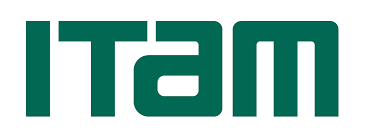

In [56]:
# Inicio de M para usuarios.
from IPython.core.display import Image, display
from tqdm import tqdm
display(Image('C:/Users/DANIEL/Documents/itam/itam_logo.png', width=500, unconfined=True))

---

<font color='#508072'> 
$ \Large \textbf {Data science and machine learning applied to financial markets} $

<font color='#508072'> 
$ \normalsize \textbf {Author: Daniel Omar Becerril Olguín} $

<font color='#508072'> 
$ \normalsize \textbf {CU: 183605} $

<font color='#508072'> 
$ \normalsize \textbf {Tarea 3: Web Scrapping} $

---

## Prerequisites

In [184]:
#importamos las librerias
import pandas as pd
from requests_html import HTML
from requests_html import HTMLSession
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="color:crimson">Ejercicios</h2>

1. Repite el ejemplo *Arxiv ML Papers (I)*, agrega dos nuevas columnas al DataFrame final: `Abstract`, con el resumen de cada paper; `Submitted`, con la fecha en la que fue agregado al sistema. **Hint**: Ambos elementos se encuentran dentro de la *url* encontrada.

----

**solución:**

In [82]:
url = "https://arxiv.org/list/stat.ML/recent"
with HTMLSession() as sess:
    r = sess.get(url)
r

<Response [200]>

In [83]:
divpage = r.html.find("div[id='dlpage']", first=True)

In [84]:
papers_links = divpage.find("dt")
papers_titles = divpage.find("dd")

In [85]:
values = []
for link_secc, title_secc in zip(papers_links, papers_titles):
    title = title_secc.find("div[class='list-title mathjax']", first=True).text
    
    abstract_url = link_secc.find("a[title='Abstract']", first=True).absolute_links
    abstract_url, *_ = abstract_url
    
    values.append([title, abstract_url])

In [86]:
#Tamanio del arreglo
tamanio = len(papers_links)

#Listas para guardar requeridos
lista_resumen = []
lista_fh = []

for i in range(tamanio):
    print(values[i][1])
    url = values[i][1]
    #Crea Sesión a URL
    r = sess.get(url)
    r
    divpage = r.html.find("div[id='abs']", first=True)
    fh_paper = divpage.find("div[class='dateline']",first=True).text
    abstract_paper = divpage.find("blockquote[class='abstract mathjax']",first=True).text
    
    #Guarda en listas
    lista_resumen.append(abstract_paper)
    lista_fh.append(fh_paper)
    
    

https://arxiv.org/abs/2002.12321
https://arxiv.org/abs/2002.12253
https://arxiv.org/abs/2002.12011
https://arxiv.org/abs/2002.11955
https://arxiv.org/abs/2002.11912
https://arxiv.org/abs/2002.11879
https://arxiv.org/abs/2002.11743
https://arxiv.org/abs/2002.12334
https://arxiv.org/abs/2002.12326
https://arxiv.org/abs/2002.12317
https://arxiv.org/abs/2002.12312
https://arxiv.org/abs/2002.12307
https://arxiv.org/abs/2002.12301
https://arxiv.org/abs/2002.12287
https://arxiv.org/abs/2002.12277
https://arxiv.org/abs/2002.12242
https://arxiv.org/abs/2002.12229
https://arxiv.org/abs/2002.12222
https://arxiv.org/abs/2002.12211
https://arxiv.org/abs/2002.12200
https://arxiv.org/abs/2002.12174
https://arxiv.org/abs/2002.12173
https://arxiv.org/abs/2002.12169
https://arxiv.org/abs/2002.12168
https://arxiv.org/abs/2002.12164


In [87]:
for i in range(tamanio):
    values[i].append(lista_resumen[i])
    values[i].append(lista_fh[i])
    
    print(values[i])

['Title: PAPRIKA: Private Online False Discovery Rate Control', 'https://arxiv.org/abs/2002.12321', 'Abstract: In hypothesis testing, a false discovery occurs when a hypothesis is incorrectly rejected due to noise in the sample. When adaptively testing multiple hypotheses, the probability of a false discovery increases as more tests are performed. Thus the problem of False Discovery Rate (FDR) control is to find a procedure for testing multiple hypotheses that accounts for this effect in determining the set of hypotheses to reject. The goal is to minimize the number (or fraction) of false discoveries, while maintaining a high true positive rate (i.e., correct discoveries).\nIn this work, we study False Discovery Rate (FDR) control in multiple hypothesis testing under the constraint of differential privacy for the sample. Unlike previous work in this direction, we focus on the online setting, meaning that a decision about each hypothesis must be made immediately after the test is perfor

['Title: State-only Imitation with Transition Dynamics Mismatch', 'https://arxiv.org/abs/2002.11879', 'Abstract: Imitation Learning (IL) is a popular paradigm for training agents to achieve complicated goals by leveraging expert behavior, rather than dealing with the hardships of designing a correct reward function. With the environment modeled as a Markov Decision Process (MDP), most of the existing IL algorithms are contingent on the availability of expert demonstrations in the same MDP as the one in which a new imitator policy is to be learned. This is uncharacteristic of many real-life scenarios where discrepancies between the expert and the imitator MDPs are common, especially in the transition dynamics function. Furthermore, obtaining expert actions may be costly or infeasible, making the recent trend towards state-only IL (where expert demonstrations constitute only states or observations) ever so promising. Building on recent adversarial imitation approaches that are motivated 

['Title: Heterogeneous Graph Neural Networks for Malicious Account Detection', 'https://arxiv.org/abs/2002.12307', "Abstract: We present, GEM, the first heterogeneous graph neural network approach for detecting malicious accounts at Alipay, one of the world's leading mobile cashless payment platform. Our approach, inspired from a connected subgraph approach, adaptively learns discriminative embeddings from heterogeneous account-device graphs based on two fundamental weaknesses of attackers, i.e. device aggregation and activity aggregation. For the heterogeneous graph consists of various types of nodes, we propose an attention mechanism to learn the importance of different types of nodes, while using the sum operator for modeling the aggregation patterns of nodes in each type. Experiments show that our approaches consistently perform promising results compared with competitive methods over time.", '(Submitted on 27 Feb 2020)']
['Title: An On-Device Federated Learning Approach for Cooper

['Title: Woodbury Transformations for Deep Generative Flows', 'https://arxiv.org/abs/2002.12229', "Abstract: Normalizing flows are deep generative models that allow efficient likelihood calculation and sampling. The core requirement for this advantage is that they are constructed using functions that can be efficiently inverted and for which the determinant of the function's Jacobian can be efficiently computed. Researchers have introduced various such flow operations, but few of these allow rich interactions among variables without incurring significant computational costs. In this paper, we introduce Woodbury transformations, which achieve efficient invertibility via the Woodbury matrix identity and efficient determinant calculation via Sylvester's determinant identity. In contrast with other operations used in state-of-the-art normalizing flows, Woodbury transformations enable (1) high-dimensional interactions, (2) efficient sampling, and (3) efficient likelihood evaluation. Other s

['Title: Kalman Recursions Aggregated Online', 'https://arxiv.org/abs/2002.12173', 'Abstract: In this article, we aim at improving the prediction of expert aggregation by using the underlying properties of the models that provide expert predictions. We restrict ourselves to the case where expert predictions come from Kalman recursions, fitting state-space models. By using exponential weights, we construct different algorithms of Kalman recursions Aggregated Online (KAO) that compete with the best expert or the best convex combination of experts in a more or less adaptive way. We improve the existing results on expert aggregation literature when the experts are Kalman recursions by taking advantage of the second-order properties of the Kalman recursions. We apply our approach to Kalman recursions and extend it to the general adversarial expert setting by state-space modeling the errors of the experts. We apply these new algorithms to a real dataset of electricity consumption and show ho

In [88]:
df_values = pd.DataFrame(values, columns=["title", "url", "Abstract", "Submitted"])
df_values.head()

,title,url,Abstract,Submitted
0,Title: PAPRIKA: Private Online False Discovery...,https://arxiv.org/abs/2002.12321,"Abstract: In hypothesis testing, a false disco...",(Submitted on 27 Feb 2020)
1,Title: MetFlow: A New Efficient Method for Bri...,https://arxiv.org/abs/2002.12253,"Abstract: In this contribution, we propose a n...",(Submitted on 27 Feb 2020)
2,Title: Semi-supervised Anomaly Detection on At...,https://arxiv.org/abs/2002.12011,Abstract: We propose a simple yet effective me...,(Submitted on 27 Feb 2020)
3,Title: Fast and Three-rious: Speeding Up Weak ...,https://arxiv.org/abs/2002.11955,Abstract: Weak supervision is a popular method...,(Submitted on 27 Feb 2020)
4,Title: Max-Affine Spline Insights into Deep Ge...,https://arxiv.org/abs/2002.11912,Abstract: We connect a large class of Generati...,(Submitted on 26 Feb 2020)


In [93]:
# Depuramos la información que no necesitamos
df_values = df_values.assign(title=df_values.title.str.lstrip("Title: "))
df_values = df_values.assign(Abstract=df_values.Abstract.str.lstrip("Abstract: "))
df_values = df_values.assign(Submitted=df_values.Submitted.str.lstrip("(Submitted on "))
df_values = df_values.assign(Submitted=df_values.Submitted.str.lstrip(")"))
df_values.head()

,title,url,Abstract,Submitted
0,PAPRIKA: Private Online False Discovery Rate C...,https://arxiv.org/abs/2002.12321,"In hypothesis testing, a false discovery occur...",27 Feb 2020)
1,MetFlow: A New Efficient Method for Bridging t...,https://arxiv.org/abs/2002.12253,"In this contribution, we propose a new computa...",27 Feb 2020)
2,Semi-supervised Anomaly Detection on Attribute...,https://arxiv.org/abs/2002.12011,We propose a simple yet effective method for d...,27 Feb 2020)
3,Fast and Three-rious: Speeding Up Weak Supervi...,https://arxiv.org/abs/2002.11955,Weak supervision is a popular method for build...,27 Feb 2020)
4,Max-Affine Spline Insights into Deep Generativ...,https://arxiv.org/abs/2002.11912,We connect a large class of Generative Deep Ne...,26 Feb 2020)


---

2. Por medio de la librería `requests` y el API de AlphaVantage, consigue los precios históricos de las monedas `["MXN", "EUR", "BRL", "ARS", "CHF"]` respecto al dólar (todos los precios deben estar en dólares). Crea un DataFrame con cada colúmna la moneda de referencia:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>MXN</th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2014-11-24</th>      <td>0.0732</td>      <td>1.2438</td>      <td>0.3920</td>      <td>0.1169</td>      <td>1.0342</td>    </tr>    <tr>      <th>2014-11-25</th>      <td>0.0731</td>      <td>1.2473</td>      <td>0.3955</td>      <td>0.1169</td>      <td>1.0370</td>    </tr>    <tr>      <th>2014-11-26</th>      <td>0.0728</td>      <td>1.2507</td>      <td>0.3995</td>      <td>0.1168</td>      <td>1.0401</td>    </tr>    <tr>      <th>2014-11-27</th>      <td>0.0726</td>      <td>1.2458</td>      <td>0.3947</td>      <td>0.1169</td>      <td>1.0363</td>    </tr>    <tr>      <th>2014-11-28</th>      <td>0.0717</td>      <td>1.2451</td>      <td>0.3891</td>      <td>0.1168</td>      <td>1.0351</td>    </tr>  </tbody></table>


----

**solución:**

In [104]:
url = "https://www.alphavantage.co"
base_url = "https://www.alphavantage.co/query"


# Cargamos el API Key de Alpha Vantage (es personal)
avkey = 'IP53JIGJF9SSQ12F'

In [148]:
Lista_monedas = ["MXN", "EUR", "BRL", "ARS", "CHF"]
dat1 = pd.DataFrame()

for i in Lista_monedas:
    intraday1 = {
        "function": "FX_DAILY",
        "to_symbol": "USD",
        "from_symbol": i,
        "apikey": avkey,
        "outputsize": "full",
    }

    r = requests.get(base_url, params=intraday1)
    data = r.json()
    
    df_data = pd.DataFrame(data["Time Series FX (Daily)"], dtype=float).T.sort_index()
    
    s = df_data["4. close"]
    s = s.rename(i)
    if i == "MXN":
        ser_MXN = s
    if i == "EUR":
        ser_EUR = s
    if i == "BRL":
        ser_BRL = s
    if i == "ARS":
        ser_ARS = s
    if i == "CHF":
        ser_CHF = s

In [247]:
frames = [ser_MXN, ser_EUR, ser_BRL, ser_ARS, ser_CHF]
result = pd.concat(frames, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [181]:
result.filter(like='2014-11-2', axis=0)

,MXN,EUR,BRL,ARS,CHF
2014-11-20,0.0732,1.2542,0.3882,0.1169,1.0432
2014-11-21,0.0733,1.2390,0.3971,0.1169,1.0307
2014-11-22,0.0734,NaN,0.3971,0.1169,1.0307
2014-11-23,0.0733,1.2371,0.3960,0.1169,1.0282
2014-11-24,0.0732,1.2438,0.3920,0.1169,1.0342
2014-11-25,0.0731,1.2473,0.3955,0.1169,1.0370
2014-11-26,0.0728,1.2507,0.3995,0.1168,1.0401
2014-11-27,0.0726,1.2458,0.3947,0.1169,1.0363
2014-11-28,0.0717,1.2451,0.3891,0.1168,1.0351
2014-11-29,0.0717,NaN,NaN,NaN,1.0351


---

3. Con el DataFrame creado en el ejercicio 2, crea el siguiente mapa de calor con la correlación entre cada una de las monedas. **hint**: Revisa que métodos tiene un DataFrame para crear correlaciones; considera la librería `seaborn`.

![](//C:/Users/DANIEL/Documents/itam/data-science-master/data-science-master/files/lec04/imgs/heatmap.png)

---

**Solución:**

''

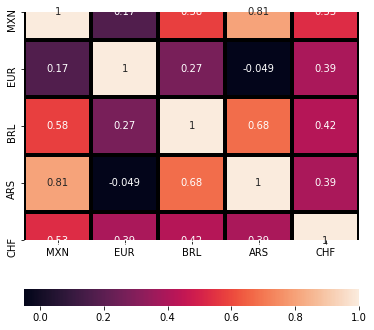

In [194]:
plt.figure(figsize=(6,6))

sns.heatmap(result.corr(), annot=True,linewidths=3, linecolor='black', cbar_kws= {'orientation': 'horizontal'} )
;

---

4. Con el DataFrame creado en el ejercicio 2, crea un nuevo DataFrame que incluya una correlación móvil con ventana de 30 días de cada una de las monedas respecto a `"MXN"`. **hint**: Investiga sobre el método `.xs` de un DataFrame

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2015-03-19</th>      <td>0.900941</td>      <td>0.870440</td>      <td>0.835029</td>      <td>0.916637</td>    </tr>    <tr>      <th>2015-03-20</th>      <td>0.874866</td>      <td>0.815453</td>      <td>0.762308</td>      <td>0.903594</td>    </tr>    <tr>      <th>2015-03-22</th>      <td>0.866783</td>      <td>0.789977</td>      <td>0.726098</td>      <td>0.900547</td>    </tr>    <tr>      <th>2015-03-23</th>      <td>0.835823</td>      <td>0.728781</td>      <td>0.643129</td>      <td>0.885424</td>    </tr>    <tr>      <th>2015-03-24</th>      <td>0.801267</td>      <td>0.671188</td>      <td>0.560149</td>      <td>0.877682</td>    </tr>  </tbody></table>

---

**Solución:**

In [318]:
Moving_corr = result.rolling(window = 30, min_periods=1).corr()

Moving_corr = Moving_corr[['EUR','BRL','ARS','CHF']].xs('MXN', level=1)

Moving_corr.filter(like='2015-03-', axis=0)

,EUR,BRL,ARS,CHF
2015-03-01,0.375563,0.724174,0.513570,0.456223
2015-03-02,0.411150,0.736225,0.541570,0.546787
2015-03-03,0.420163,0.835643,0.599435,0.582964
2015-03-04,0.472703,0.846832,0.619405,0.608157
2015-03-05,0.547353,0.851664,0.674150,0.688715
2015-03-06,0.752973,0.879688,0.687692,0.761216
2015-03-07,0.811307,0.899697,0.693082,0.740230
2015-03-08,0.855316,0.917574,0.727256,0.791467
2015-03-09,0.879569,0.933969,0.754224,0.828235
2015-03-10,0.909718,0.941278,0.769170,0.861620


---

5. Con el DataFrame creado en el ejercicio 4, crea la siguiente figura con _scatterplots_ entre todas las combinaciones de las correlaciones respecto a `"MXN"`. ¿Encuentras algún patrón en alguna combinación?

![](../files/lec04/imgs/scatter.png)

---

**Solución:**

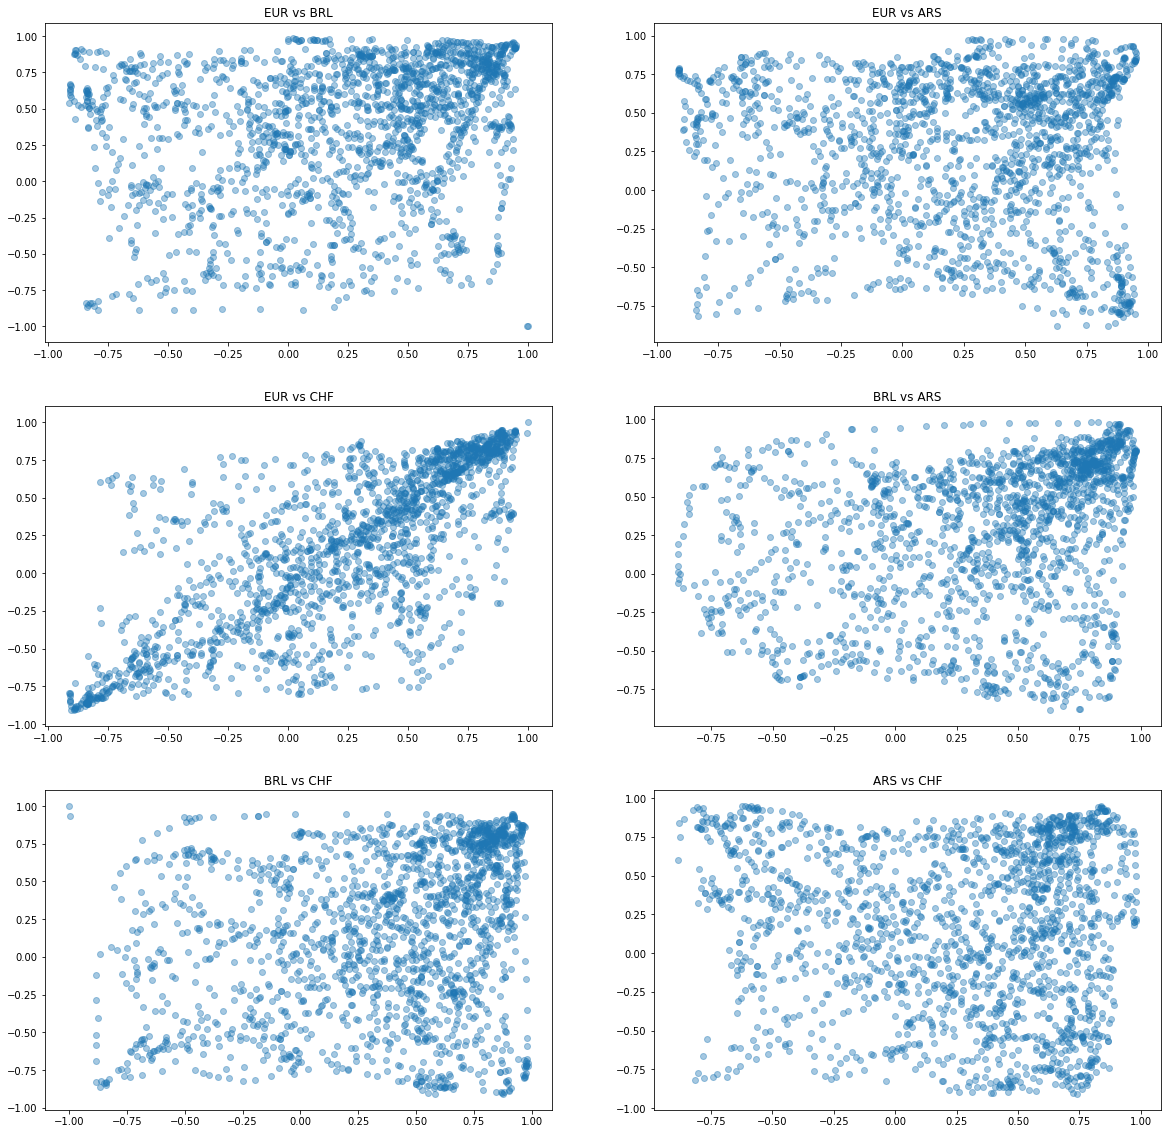

In [342]:
plt.figure(figsize=(20,20))


plt.subplot(321)
plt.title('EUR vs BRL')
plt.scatter(x = Moving_corr.EUR, y = Moving_corr.BRL, alpha=.4)

plt.subplot(322)
plt.title('EUR vs ARS')
plt.scatter(x = Moving_corr.EUR, y = Moving_corr.ARS, alpha=.4)

plt.subplot(323)
plt.title('EUR vs CHF')
plt.scatter(x = Moving_corr.EUR, y = Moving_corr.CHF, alpha=.4)

plt.subplot(324)
plt.title('BRL vs ARS')
plt.scatter(x = Moving_corr.BRL, y = Moving_corr.ARS, alpha=.4)

plt.subplot(325)
plt.title('BRL vs CHF')
plt.scatter(x = Moving_corr.BRL, y = Moving_corr.CHF, alpha=.4)

plt.subplot(326)
plt.title('ARS vs CHF')
plt.scatter(x = Moving_corr.ARS, y = Moving_corr.CHF, alpha=.4)


plt.show()

---

6. Con el DataFrame creado en el ejercicio 4, crea la siguiente figura, la cuál representa, a cada observación, la correlación promedio entre todas las monedas respecto a `"MXN"` y unas bandas que representan la correlación máxima y mínima a cada observación.

![](../files/lec04/imgs/corr_ts.png)

''

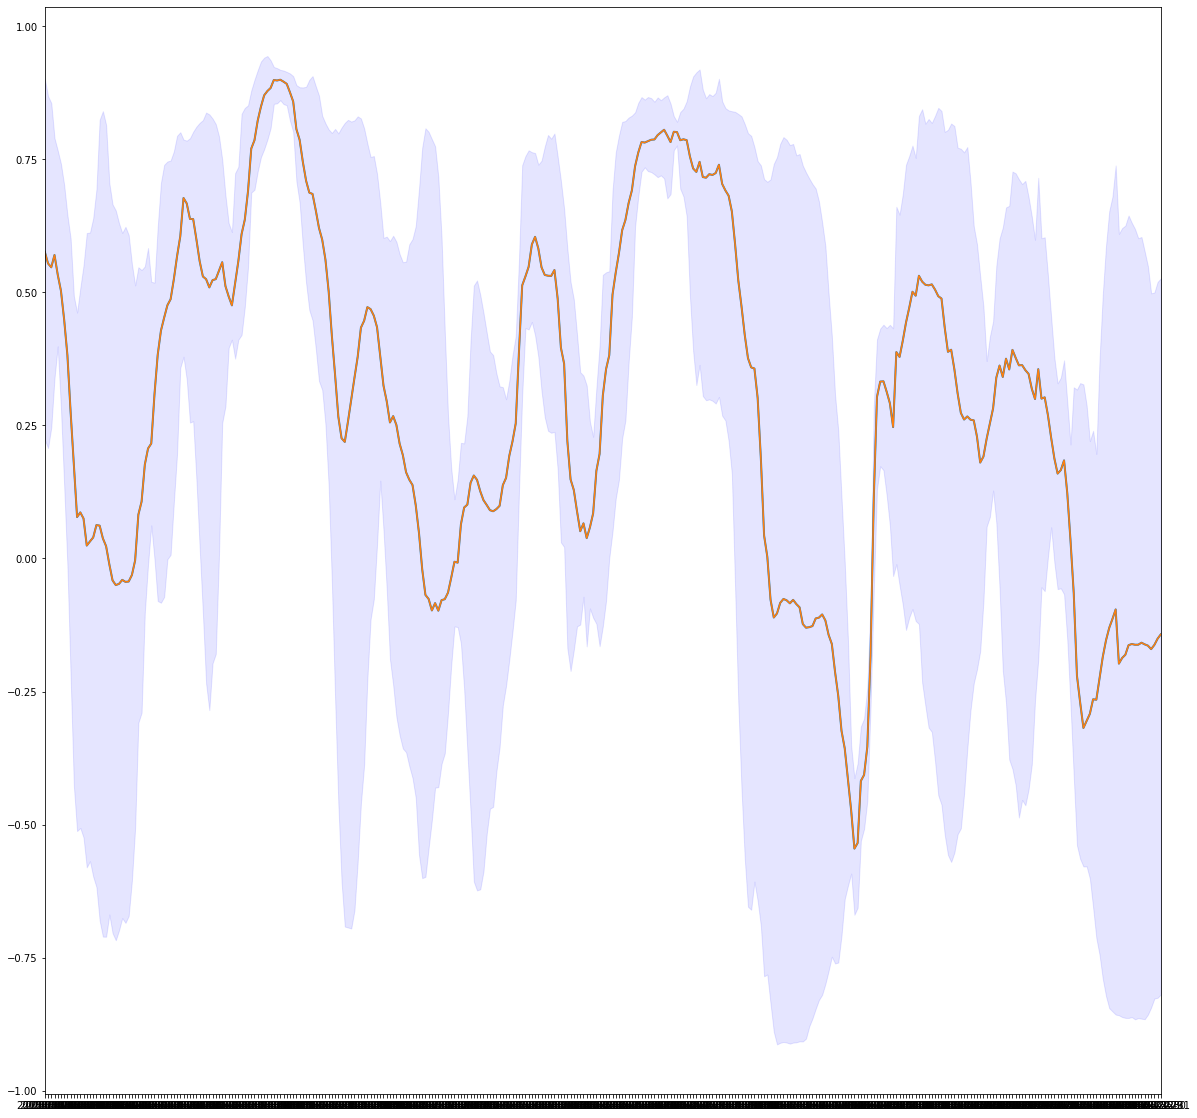

In [357]:
plt.figure(figsize=(20,20))


ts_mean = Moving_corr.mean(axis=1,skipna=True)
# 2017-04-01: Lunes
sample = ts_mean.loc["2015-01-01": "2015-12-31"]

under_line = Moving_corr.max(axis=1,skipna=True)
under_line = under_line.loc["2015-01-01": "2015-12-31"]

over_line = Moving_corr.min(axis=1,skipna=True)
over_line = over_line.loc["2015-01-01": "2015-12-31"]


#Plotting:
plt.plot(sample, linewidth=2) #mean curve.
plt.fill_between(sample.index, under_line, over_line, color='b', alpha=.1) #std curves.
sample.plot()
;